In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
    print('Column name {} and unique values are {}'.format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [7]:
import datetime
now = datetime.datetime.now().year

In [8]:
df['Total Years'] = now - df.YearBuilt

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,20


In [10]:
df.drop('YearBuilt',axis=1,inplace=True)

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

**Creating Categorical Features**

In [12]:
cat_features = ['MSSubClass','MSZoning','Street','LotShape']
out_feature = 'SalePrice'

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = {}
lbl_encoder['MSSubClass'] = LabelEncoder()
lbl_encoder['MSSubClass'].fit_transform(df.MSSubClass)

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [14]:
lbl_encoder={}

for feature in cat_features:
    lbl_encoder[feature] = LabelEncoder()
    df[feature] = lbl_encoder[feature].fit_transform(df[feature])

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,17
1,0,3,80.0,9600,1,3,1262,0,181500,44
2,5,3,68.0,11250,1,0,920,866,223500,19
3,6,3,60.0,9550,1,0,961,756,140000,105
4,5,3,84.0,14260,1,0,1145,1053,250000,20


**Stacking and Converting into Tensors**

In [16]:
cat_features = np.stack([df.MSSubClass,df.MSZoning,df.Street,df.LotShape],axis=1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

**Now Converting Numpy into Tensors**

In [17]:
import torch
cat_features = torch.tensor(cat_features,dtype = torch.int64)

# Note : Categorical feature cannot be converted into Float,never try to do that

**Creating a Continous Variable**

In [18]:
cont_features = []
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [19]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

**Stacking Continous Variable into Tensor**

In [20]:
cont_values = np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [21]:
y = torch.tensor(df.SalePrice.values,dtype = torch.float).reshape(-1,1)

In [22]:
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

**Embedding Size For Categorical Columns**

In [23]:
cat_dims = [len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"
]]

In [24]:
cat_dims

[15, 5, 2, 4]

In [25]:
# Output dimension should be set based on the input dimension(min(50, feature dim +1 /2))
embedding_dim = [(x,min(50, (x+1) // 2)) for x in cat_dims]

In [26]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])

In [28]:
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [29]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [30]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [31]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [32]:
embedding_val

[tensor([[ 1.1702,  0.7870,  1.4392,  ..., -1.5778,  1.5108,  0.4282],
         [ 0.7317,  0.7896,  1.1764,  ..., -0.3720, -0.8579, -0.9372],
         [ 1.1702,  0.7870,  1.4392,  ..., -1.5778,  1.5108,  0.4282],
         ...,
         [ 1.1124, -0.9597, -0.2177,  ..., -1.0665,  0.6084,  0.1495],
         [ 0.7317,  0.7896,  1.1764,  ..., -0.3720, -0.8579, -0.9372],
         [ 0.7317,  0.7896,  1.1764,  ..., -0.3720, -0.8579, -0.9372]],
        grad_fn=<EmbeddingBackward>),
 tensor([[ 0.8743, -1.2061, -0.0157],
         [ 0.8743, -1.2061, -0.0157],
         [ 0.8743, -1.2061, -0.0157],
         ...,
         [ 0.8743, -1.2061, -0.0157],
         [ 0.8743, -1.2061, -0.0157],
         [ 0.8743, -1.2061, -0.0157]], grad_fn=<EmbeddingBackward>),
 tensor([[0.8268],
         [0.8268],
         [0.8268],
         ...,
         [0.8268],
         [0.8268],
         [0.8268]], grad_fn=<EmbeddingBackward>),
 tensor([[ 1.7959, -0.6654],
         [ 1.7959, -0.6654],
         [-0.1840,  0.8513],
  

In [33]:
z = torch.cat(embedding_val,1)

In [34]:
z

tensor([[ 1.1702,  0.7870,  1.4392,  ...,  0.8268,  1.7959, -0.6654],
        [ 0.7317,  0.7896,  1.1764,  ...,  0.8268,  1.7959, -0.6654],
        [ 1.1702,  0.7870,  1.4392,  ...,  0.8268, -0.1840,  0.8513],
        ...,
        [ 1.1124, -0.9597, -0.2177,  ...,  0.8268,  1.7959, -0.6654],
        [ 0.7317,  0.7896,  1.1764,  ...,  0.8268,  1.7959, -0.6654],
        [ 0.7317,  0.7896,  1.1764,  ...,  0.8268,  1.7959, -0.6654]],
       grad_fn=<CatBackward>)

In [35]:
dropout = nn.Dropout(0.4)
final_embed = dropout(z)
final_embed

tensor([[ 1.9504,  1.3117,  0.0000,  ...,  1.3780,  2.9931, -1.1090],
        [ 1.2195,  1.3159,  0.0000,  ...,  1.3780,  2.9931, -0.0000],
        [ 1.9504,  0.0000,  2.3986,  ...,  0.0000, -0.3067,  1.4188],
        ...,
        [ 0.0000, -1.5994, -0.3629,  ...,  1.3780,  2.9931, -1.1090],
        [ 1.2195,  1.3159,  1.9607,  ...,  1.3780,  0.0000, -1.1090],
        [ 1.2195,  0.0000,  1.9607,  ...,  1.3780,  2.9931, -1.1090]],
       grad_fn=<MulBackward0>)

**Creating a Feed Forward Neural Network**

In [36]:
# all the above embedding steps should be perform in neural network

In [37]:
import torch
import torch.nn as n
import torch.nn.functional as F

In [38]:
class FeedForwardNN(nn.Module):
    def __init__(self,embedding_dim,n_cont=len(cont_features),out_sz=1,layers=[100,50],p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.embed_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_inp = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_inp,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_inp = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embedding = []
        for i,e in enumerate(self.embeds):
            embedding.append(e(x_cat[:,i]))
        x = torch.cat(embedding,1)
        x = self.embed_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x
    

In [39]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim)

In [40]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (embed_drop): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

**Loss and Optimizer**

In [41]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [42]:
df.shape

(1201, 10)

In [43]:
batch_size = 1200
test_size = int(batch_size*0.15)
train_categorical = cat_features[:batch_size-test_size]
test_categorical = cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [44]:
epochs = 10000
final_loss = []
for i in range(epochs):
    i=i+1
    y_pred = model(train_categorical,train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train)) ## RMSE
    final_loss.append(loss)
    if i%10 == 1 :
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward() # backpropagation
    optimizer.step()

Epoch number: 1 and the loss : 200496.796875
Epoch number: 11 and the loss : 200493.640625
Epoch number: 21 and the loss : 200489.296875
Epoch number: 31 and the loss : 200482.875
Epoch number: 41 and the loss : 200473.875
Epoch number: 51 and the loss : 200461.765625
Epoch number: 61 and the loss : 200446.984375
Epoch number: 71 and the loss : 200430.078125
Epoch number: 81 and the loss : 200409.28125
Epoch number: 91 and the loss : 200384.90625
Epoch number: 101 and the loss : 200356.484375
Epoch number: 111 and the loss : 200324.296875
Epoch number: 121 and the loss : 200293.03125
Epoch number: 131 and the loss : 200253.578125
Epoch number: 141 and the loss : 200208.84375
Epoch number: 151 and the loss : 200162.765625
Epoch number: 161 and the loss : 200117.65625
Epoch number: 171 and the loss : 200062.5
Epoch number: 181 and the loss : 200009.75
Epoch number: 191 and the loss : 199950.0625
Epoch number: 201 and the loss : 199882.4375
Epoch number: 211 and the loss : 199822.546875
E

Epoch number: 1771 and the loss : 155032.390625
Epoch number: 1781 and the loss : 154894.3125
Epoch number: 1791 and the loss : 154333.5625
Epoch number: 1801 and the loss : 153967.078125
Epoch number: 1811 and the loss : 153139.5
Epoch number: 1821 and the loss : 152580.953125
Epoch number: 1831 and the loss : 152767.90625
Epoch number: 1841 and the loss : 152200.6875
Epoch number: 1851 and the loss : 150820.28125
Epoch number: 1861 and the loss : 150897.015625
Epoch number: 1871 and the loss : 150832.984375
Epoch number: 1881 and the loss : 149261.15625
Epoch number: 1891 and the loss : 148748.453125
Epoch number: 1901 and the loss : 149456.5
Epoch number: 1911 and the loss : 149151.0625
Epoch number: 1921 and the loss : 148313.578125
Epoch number: 1931 and the loss : 147496.953125
Epoch number: 1941 and the loss : 147124.546875
Epoch number: 1951 and the loss : 146692.484375
Epoch number: 1961 and the loss : 145744.46875
Epoch number: 1971 and the loss : 146085.421875
Epoch number: 

Epoch number: 3501 and the loss : 70371.4921875
Epoch number: 3511 and the loss : 72621.1171875
Epoch number: 3521 and the loss : 70795.796875
Epoch number: 3531 and the loss : 70334.578125
Epoch number: 3541 and the loss : 71788.1640625
Epoch number: 3551 and the loss : 70856.90625
Epoch number: 3561 and the loss : 70115.6640625
Epoch number: 3571 and the loss : 71060.0078125
Epoch number: 3581 and the loss : 68906.203125
Epoch number: 3591 and the loss : 68823.0703125
Epoch number: 3601 and the loss : 66131.5859375
Epoch number: 3611 and the loss : 69779.234375
Epoch number: 3621 and the loss : 67800.1640625
Epoch number: 3631 and the loss : 66855.953125
Epoch number: 3641 and the loss : 67761.5546875
Epoch number: 3651 and the loss : 66953.5078125
Epoch number: 3661 and the loss : 66146.8515625
Epoch number: 3671 and the loss : 63716.50390625
Epoch number: 3681 and the loss : 63500.94140625
Epoch number: 3691 and the loss : 63668.6015625
Epoch number: 3701 and the loss : 63698.65234

Epoch number: 5221 and the loss : 39830.44921875
Epoch number: 5231 and the loss : 38775.625
Epoch number: 5241 and the loss : 39848.3671875
Epoch number: 5251 and the loss : 39074.75390625
Epoch number: 5261 and the loss : 39944.1328125
Epoch number: 5271 and the loss : 40459.1171875
Epoch number: 5281 and the loss : 36725.74609375
Epoch number: 5291 and the loss : 38994.54296875
Epoch number: 5301 and the loss : 38987.07421875
Epoch number: 5311 and the loss : 43127.5625
Epoch number: 5321 and the loss : 40139.7265625
Epoch number: 5331 and the loss : 42256.4609375
Epoch number: 5341 and the loss : 39898.9765625
Epoch number: 5351 and the loss : 39780.26171875
Epoch number: 5361 and the loss : 37707.93359375
Epoch number: 5371 and the loss : 39612.75
Epoch number: 5381 and the loss : 40562.66796875
Epoch number: 5391 and the loss : 40846.6953125
Epoch number: 5401 and the loss : 39887.09375
Epoch number: 5411 and the loss : 39379.83203125
Epoch number: 5421 and the loss : 39352.15234

Epoch number: 6931 and the loss : 39210.19140625
Epoch number: 6941 and the loss : 38947.25390625
Epoch number: 6951 and the loss : 39142.625
Epoch number: 6961 and the loss : 39622.1171875
Epoch number: 6971 and the loss : 41659.13671875
Epoch number: 6981 and the loss : 38953.28125
Epoch number: 6991 and the loss : 39322.4609375
Epoch number: 7001 and the loss : 37643.02734375
Epoch number: 7011 and the loss : 38981.27734375
Epoch number: 7021 and the loss : 38441.83984375
Epoch number: 7031 and the loss : 41869.58984375
Epoch number: 7041 and the loss : 39595.69921875
Epoch number: 7051 and the loss : 42696.01953125
Epoch number: 7061 and the loss : 39692.7890625
Epoch number: 7071 and the loss : 36662.4296875
Epoch number: 7081 and the loss : 39688.9765625
Epoch number: 7091 and the loss : 39231.484375
Epoch number: 7101 and the loss : 43238.25390625
Epoch number: 7111 and the loss : 37861.2265625
Epoch number: 7121 and the loss : 39360.890625
Epoch number: 7131 and the loss : 3989

Epoch number: 8641 and the loss : 41846.19921875
Epoch number: 8651 and the loss : 39430.1015625
Epoch number: 8661 and the loss : 39881.5234375
Epoch number: 8671 and the loss : 38889.23046875
Epoch number: 8681 and the loss : 39124.80859375
Epoch number: 8691 and the loss : 39715.5703125
Epoch number: 8701 and the loss : 41269.80078125
Epoch number: 8711 and the loss : 39883.75390625
Epoch number: 8721 and the loss : 39443.9921875
Epoch number: 8731 and the loss : 41460.89453125
Epoch number: 8741 and the loss : 38776.87890625
Epoch number: 8751 and the loss : 40171.05078125
Epoch number: 8761 and the loss : 38054.7421875
Epoch number: 8771 and the loss : 39981.67578125
Epoch number: 8781 and the loss : 37948.19921875
Epoch number: 8791 and the loss : 36909.2109375
Epoch number: 8801 and the loss : 38542.9375
Epoch number: 8811 and the loss : 39195.30078125
Epoch number: 8821 and the loss : 38566.07421875
Epoch number: 8831 and the loss : 36985.43359375
Epoch number: 8841 and the los

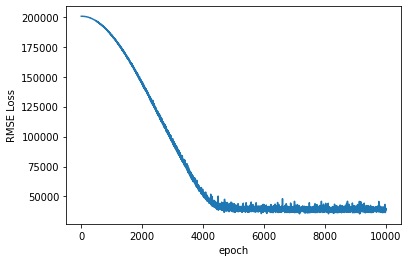

In [45]:
plt.plot(range(epochs), final_loss)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [46]:
y_pred = ""
with torch.no_grad():
    y_pred = model(test_categorical,test_cont)
    loss = torch.sqrt(loss_function(y_pred,y_test))
print('RMSE:{}'.format(loss))

RMSE:49624.21484375


In [47]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [48]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [49]:
data_predicted

,Prediction
0,130054.242188
1,172283.109375
2,172901.250000
3,293420.281250
4,152357.640625
5,229066.656250
6,174509.781250
7,172179.593750
8,135586.187500
9,409358.718750


In [50]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,130054.242188,-54.242188
1,138887.0,172283.109375,-33396.109375
2,175500.0,172901.250000,2598.750000
3,195000.0,293420.281250,-98420.281250
4,142500.0,152357.640625,-9857.640625


In [51]:
torch.save(model,'HousePrice.pt')

In [52]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [53]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [54]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [55]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (embed_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)